<a href="https://colab.research.google.com/github/RajnandiniG/ML_NLP-TF/blob/main/1.Tensorflow_Predictionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and analysing Fashion MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


**Confirm type and dimensions of the dataset**

In [2]:
type(train_images)

numpy.ndarray

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

**How many instances do we have of each of the different classes?**

In [5]:
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## An overview of the images


In [7]:
# Get 16 images at random
import random
random.seed(1)
train_idx = list(range(len(train_labels)))
sampler = random.sample(train_idx, 16)
sampler

[8805,
 37303,
 55537,
 52577,
 50054,
 4135,
 16716,
 7727,
 32468,
 49870,
 29457,
 30949,
 42702,
 24878,
 51689,
 13759]

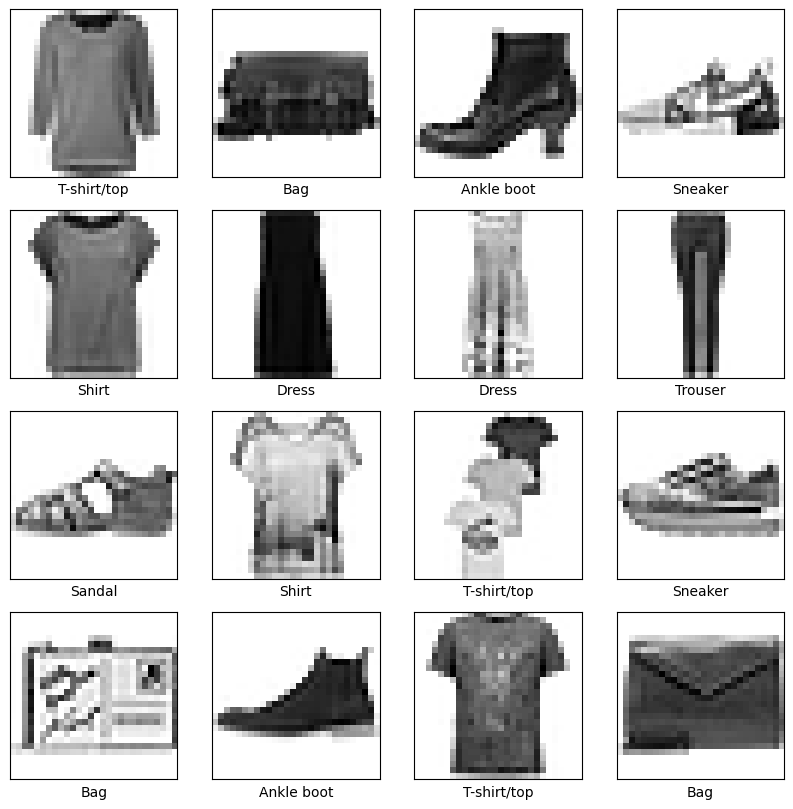

In [8]:
plt.figure(figsize=(10, 10))
for i in range(len(sampler)):
 plt.subplot(4,4,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[sampler[i]], cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[sampler[i]]])
plt.show()


**What does one image look like?**

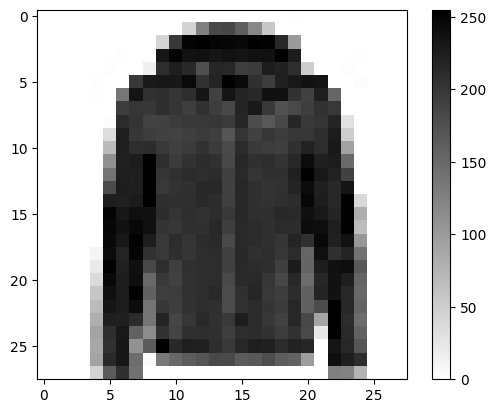

In [9]:
random_image_id = 5000
plt.figure()
plt.imshow(train_images[random_image_id],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
class_names[train_labels[random_image_id]]

'Coat'

In [11]:
train_images[random_image_id]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0, 137, 235, 204, 209, 201, 209, 234,
        190, 234, 218, 215, 238, 239, 204, 189, 224, 154,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 194, 201, 200, 209, 202, 193, 205,
        194, 183, 218, 231, 197, 172, 181, 193, 205, 199,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3, 212, 203, 188, 189, 196, 198, 198,
        201, 196, 217, 179, 167, 183, 217, 197, 202, 219,  30,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  34, 225, 200, 194, 190, 188, 192, 196,
        192, 170, 202, 190, 201, 195, 200, 201, 209, 227,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  68, 225, 210, 211, 198, 192, 196, 204,
        196, 181, 212, 197, 195, 192, 206, 220, 210, 229,  93,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 111, 223, 227, 253, 209, 196, 204, 211,
        206, 183, 216, 206, 210, 203, 215, 244, 224, 227, 150,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 139, 225, 224, 255, 202, 206, 212, 209,
        211, 190, 213, 202, 207, 206, 222, 255, 230, 220, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 180, 226, 224, 255, 199, 204, 207, 214,
        214, 190, 216, 206, 203, 205, 219, 243, 224, 214, 234,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 225, 223, 228, 254, 209, 206, 208, 213,
        210, 191, 215, 207, 204, 208, 211, 249, 226, 214, 255,  38,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 250, 232, 240, 239, 211, 203, 209, 205,
        211, 197, 215, 208, 208, 214, 213, 239, 231, 219, 255,  81,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 248, 236, 247, 240, 203, 200, 208, 206,
        214, 193, 213, 212, 208, 212, 211, 243, 242, 225, 254,  66,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 247, 230, 252, 226, 199, 211, 202, 211,
        213, 182, 213, 212, 206, 202, 219, 207, 247, 222, 237, 104,   0,
          0,   0],
       [  0,   0,   0,   0,  10, 244, 219, 250, 205, 199, 209, 202, 209,
        211, 189, 214, 206, 210, 200, 212, 154, 240, 208, 219, 140,   0,
          0,   0],
       [  0,   0,   0,   0,  21, 255, 222, 238, 184, 210, 192, 206, 209,
        210, 189, 213, 211, 209, 192, 228, 155, 226, 238, 241, 166,   0,
          0,   0],
       [  0,   0,   0,   0,  37, 245, 226, 241, 150, 197, 189, 204, 209,
        210, 183, 213, 213, 201, 184, 215, 146, 216, 236, 225, 154,   0,
          0,   0],
       [  0,   0,   0,   0,  58, 239, 227, 255, 158, 193, 195, 204, 209,
        213, 180, 207, 217, 199, 194, 211, 158, 219, 236, 216, 151,   0,
          0,   0],
       [  0,   0,   0,   0,  68, 233, 226, 243, 139, 200, 193, 205, 210,
        208, 180, 205, 212, 203, 196, 216, 157, 179, 255, 216, 155,   0,
          0,   0],
       [  0,   0,   0,   0,  81, 225, 224, 211, 138, 219, 185, 201, 213,
        207, 197, 226, 212, 200, 190, 215, 183,  90, 255, 211, 147,   0,
          0,   0],
       [  0,   0,   0,   0,  91, 210, 23

## Build, compile and train the model

In [12]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

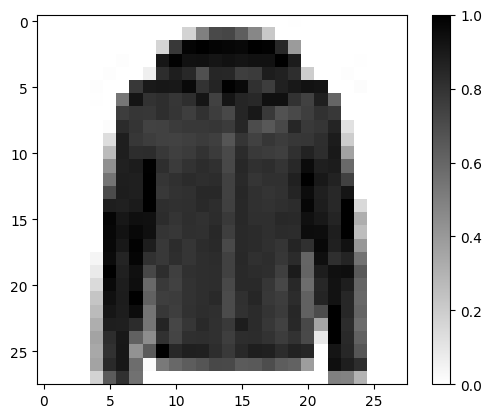

In [13]:
plt.figure()
plt.imshow(train_images[5000], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10),
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 5s 4ms/step - loss: 0.5171 - accuracy: 0.8168 - val_loss: 0.4216 - val_accuracy: 0.8537
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3785 - accuracy: 0.8635 - val_loss: 0.3755 - val_accuracy: 0.8643
Epoch 3/10
844/844 [==============================] - 4s 5ms/step - loss: 0.3380 - accuracy: 0.8763 - val_loss: 0.3524 - val_accuracy: 0.8692
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3163 - accuracy: 0.8846 - val_loss: 0.3408 - val_accuracy: 0.8825
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2963 - accuracy: 0.8905 - val_loss: 0.3448 - val_accuracy: 0.8755
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2808 - accuracy: 0.8955 - val_loss: 0.3524 - val_accuracy: 0.8697
Epoch 7/10
844/844 [==============================] - 4s 5ms/step - loss: 0.2691 - accuracy: 0.8991 - val_loss: 0.3127 - val_accuracy: 0.8867
Epoch 

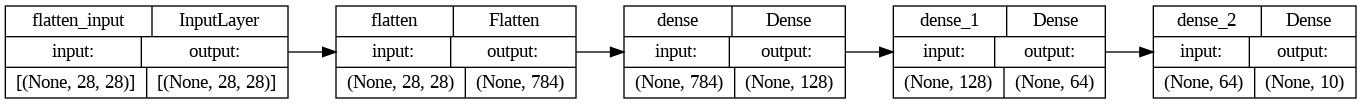

In [15]:
# FashionMNIST
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## Make predictions


313/313 [==============================] - 1s 2ms/step


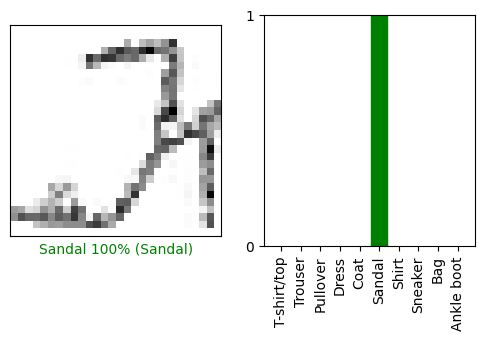

In [16]:
image_id = 1041 # Pick an image id between 0 and 9999 inclusive

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(range(10))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_id, predictions[image_id], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_id, predictions[image_id],  test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt
import random

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 10s 0us/step


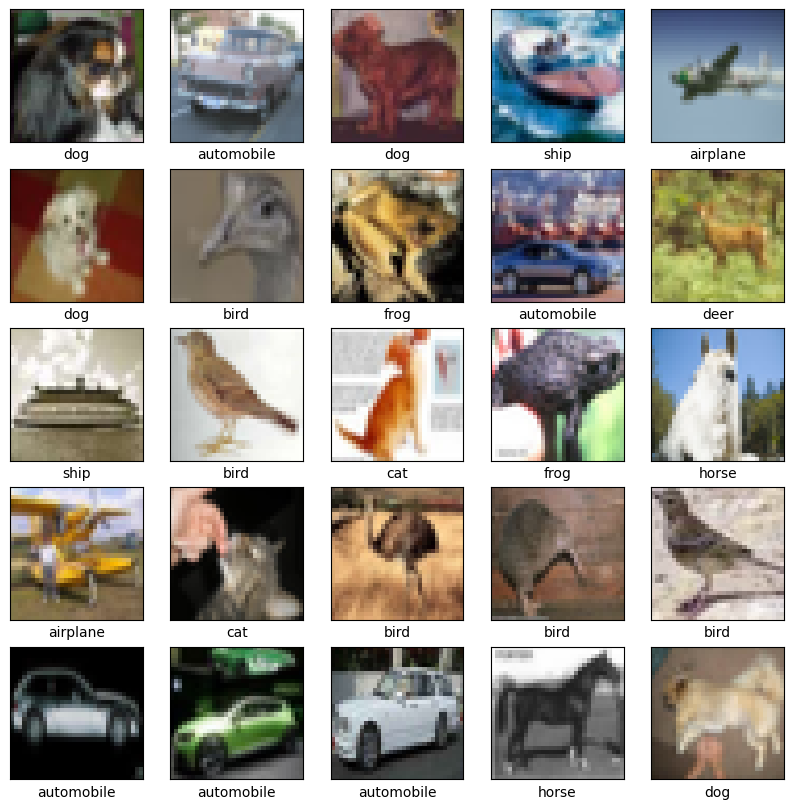

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

train_idx = list(range(len(train_labels)))

random.seed(1)
random_sample = random.sample(train_idx, 25)

plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_sample[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[random_sample[i]][0]])
plt.show()

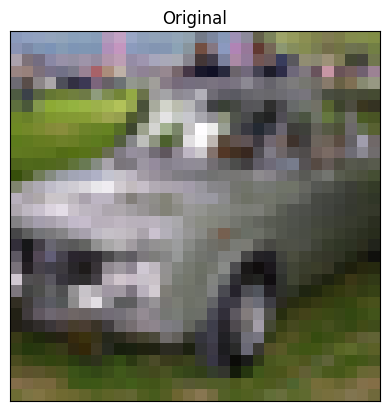

In [19]:
image_id = 44
plt.figure()
plt.imshow(train_images[image_id], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(True)
plt.title('Original')
plt.show()

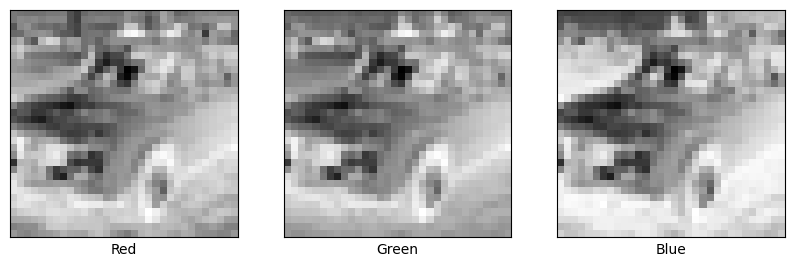

In [20]:
channel = ['Red', 'Green', 'Blue']
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[image_id][:,:, i], cmap=plt.cm.binary)
    plt.xlabel(channel[i])
plt.show()

In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

VALIDATION_STEPS = VALIDATION_DATASET_SIZE // BATCH_SIZE

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

VALIDATION_STEPS = VALIDATION_DATASET_SIZE // BATCH_SIZE

#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)), #appropriate for 32x32 RGB images (with 3 channels for red, green, and blue)
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10),
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    validation_steps=VALIDATION_STEPS)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10
391/391 [==============================] - 36s 89ms/step - loss: 1.9101 - accuracy: 0.3040 - val_loss: 1.7103 - val_accuracy: 0.3876
Epoch 2/10
391/391 [==============================] - 32s 81ms/step - loss: 1.6851 - accuracy: 0.3974 - val_loss: 1.6179 - val_accuracy: 0.4283
Epoch 3/10
391/391 [==============================] - 31s 80ms/step - loss: 1.6008 - accuracy: 0.4270 - val_loss: 1.5493 - val_accuracy: 0.4485
Epoch 4/10
391/391 [==============================] - 33s 84ms/step - loss: 1.5437 - accuracy: 0.4477 - val_loss: 1.4943 - val_accuracy: 0.4659
Epoch 5/10
391/391 [==============================] - 31s 80ms/step - loss: 1.4909 - accuracy: 0.4682 - val_loss: 1.5003 - val_accuracy: 0.4692
Epoch 6/10
391/391 [==============================] - 32s 83ms/step - loss: 1.4511 - accuracy: 0.4796 - val_loss: 1.4615 - val_accuracy: 0.4792
Epoch 7/10
391/391 [==============================] - 31s 80ms/step - loss: 1.4187 - accuracy: 0.4922 - val_loss: 1.4607 - val_accuracy:

In [23]:
#extract only red color channels (red, blue, green are channels)
train_dataset = tf.data.Dataset.from_tensor_slices((train_images[:,:,:,0], train_labels))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [24]:
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000][:,:,:,0], test_labels[:5000]))
validation_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [25]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:][:,:,:,0], test_labels[5000:]))
test_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [26]:
TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

VALIDATION_STEPS = VALIDATION_DATASET_SIZE // BATCH_SIZE

#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),              #height, width of 32 pixels
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10),
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    validation_steps=VALIDATION_STEPS)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10
391/391 [==============================] - 4s 7ms/step - loss: 2.0829 - accuracy: 0.2364 - val_loss: 1.9893 - val_accuracy: 0.2963
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.9604 - accuracy: 0.2926 - val_loss: 1.9286 - val_accuracy: 0.3173
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 1.9031 - accuracy: 0.3193 - val_loss: 1.8783 - val_accuracy: 0.3337
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8548 - accuracy: 0.3391 - val_loss: 1.8426 - val_accuracy: 0.3506
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 1.8209 - accuracy: 0.3506 - val_loss: 1.8286 - val_accuracy: 0.3526
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 1.7910 - accuracy: 0.3641 - val_loss: 1.8060 - val_accuracy: 0.3642
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7687 - accuracy: 0.3707 - val_loss: 1.7682 - val_accuracy: 0.3768
Epoch 

In [27]:
#Transfer Learning using TensorFlow Hub
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pylab as plt
import datetime

data_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

228813984/228813984 [==============================] - 8s 0us/step


In [28]:
data_dir

'/root/.keras/datasets/flower_photos'

In [29]:
!ls -lrt /root/.keras/datasets/flower_photos

total 620
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 tulips
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  49152 Feb 10  2016 dandelion
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy


In [30]:
img_height = 224
img_width = 224
BATCH_SIZE = 128

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_dir),
  validation_split=0.2, #20% of the data will be used for validation
  subset="training",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_dir),
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE
)

class_names = np.array(train_ds.class_names)
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [32]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [33]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 224, 224, 3)
(128,)


In [34]:
#Using Tensorflow hub
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = inception_v3

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

10484/10484 [==============================] - 0s 0us/step


23/23 [==============================] - 363s 15s/step


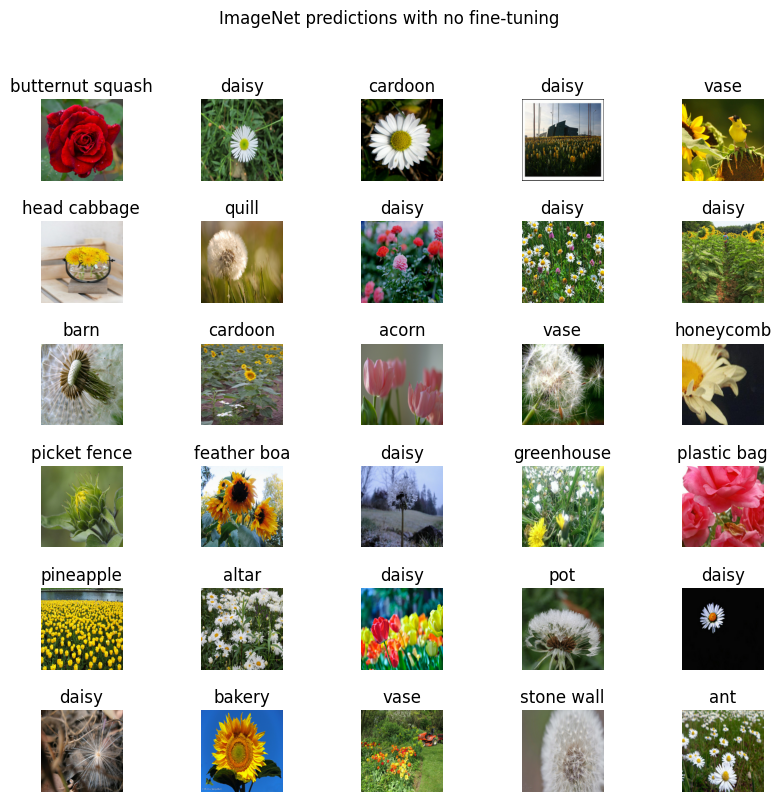

In [35]:
result_batch = classifier.predict(train_ds)
predicted_class_names = imagenet_labels[tf.math.argmax(result_batch, axis=-1)]

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions with no fine-tuning")

In [36]:
feature_extractor_model = inception_v3

feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [37]:
NUM_CLASSES = len(class_names)

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(NUM_CLASSES)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              23853833  
                                                                 
 dense_11 (Dense)            (None, 5)                 5010      
                                                                 
Total params: 23858843 (91.01 MB)
Trainable params: 5010 (19.57 KB)
Non-trainable params: 23853833 (91.00 MB)
_________________________________________________________________


In [38]:
pred = model(image_batch)

In [39]:
pred.shape

TensorShape([128, 5])

In [47]:
NUM_EPOCHS = 10

model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS).history

Epoch 1/10
23/23 [==============================] - 453s 19s/step - loss: 0.2097 - acc: 0.9302 - val_loss: 0.4774 - val_acc: 0.8597
Epoch 2/10
23/23 [==============================] - 436s 19s/step - loss: 0.1758 - acc: 0.9441 - val_loss: 0.4733 - val_acc: 0.8610
Epoch 3/10
23/23 [==============================] - 433s 19s/step - loss: 0.1658 - acc: 0.9496 - val_loss: 0.4774 - val_acc: 0.8610
Epoch 4/10
23/23 [==============================] - 431s 19s/step - loss: 0.1574 - acc: 0.9557 - val_loss: 0.4820 - val_acc: 0.8610
Epoch 5/10
23/23 [==============================] - 433s 19s/step - loss: 0.1498 - acc: 0.9581 - val_loss: 0.4874 - val_acc: 0.8610
Epoch 6/10
23/23 [==============================] - 430s 19s/step - loss: 0.1430 - acc: 0.9612 - val_loss: 0.4933 - val_acc: 0.8583
Epoch 7/10
23/23 [==============================] - 431s 19s/step - loss: 0.1368 - acc: 0.9639 - val_loss: 0.4996 - val_acc: 0.8624
Epoch 8/10
23/23 [==============================] - 428s 19s/step - loss: 0.

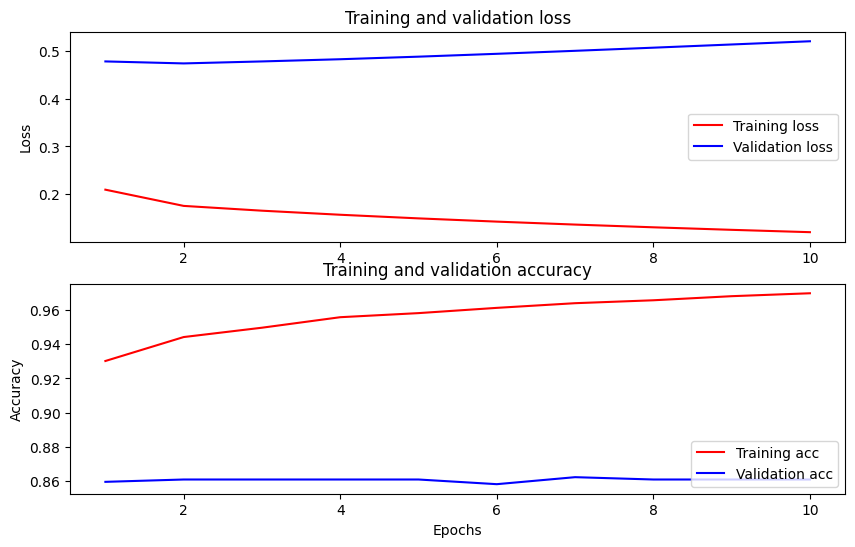

In [48]:
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [49]:
image_batch, labels = next(iter(val_ds))

predicted_batch = model.predict(image_batch)
predicted_batch

4/4 [==============================] - 16s 3s/step


array([[ -9.754952  ,  -5.6316643 ,  -0.7745417 ,  -5.003776  ,
          8.01776   ],
       [ -4.984152  ,  -4.9701777 ,   4.467673  ,   1.7597553 ,
          1.8566113 ],
       [ -2.5546615 ,   5.2459683 ,  -1.822978  ,  -1.695516  ,
         -2.9467738 ],
       [ 10.068543  ,  -0.66244274,  -3.531739  ,   0.8528239 ,
         -3.1756656 ],
       [ -5.396622  ,  -0.02786564,  -3.8330984 ,   4.636557  ,
         -2.8935952 ],
       [ -2.719523  ,  -6.257399  ,  -1.8848023 ,  -1.7707242 ,
          4.1029873 ],
       [ -1.3150263 ,  -1.189124  ,  -0.5643054 ,   7.1122937 ,
         -5.9006658 ],
       [  4.9484906 ,  -0.96113783,  -4.4377203 ,  -0.30563438,
         -0.5978271 ],
       [ -3.684017  ,  -6.7228937 ,   2.1605864 ,   0.97492075,
          4.8104734 ],
       [ -0.29766825,  -0.20191304,  -2.0069716 ,   5.099385  ,
         -3.0342073 ],
       [ -7.603288  ,  -2.2885463 ,   1.0935063 ,   2.1024725 ,
          6.1360254 ],
       [ -2.610412  ,  -3.060926  ,  -1.212

In [50]:
predicted_batch.shape

(128, 5)

In [51]:
class_names

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

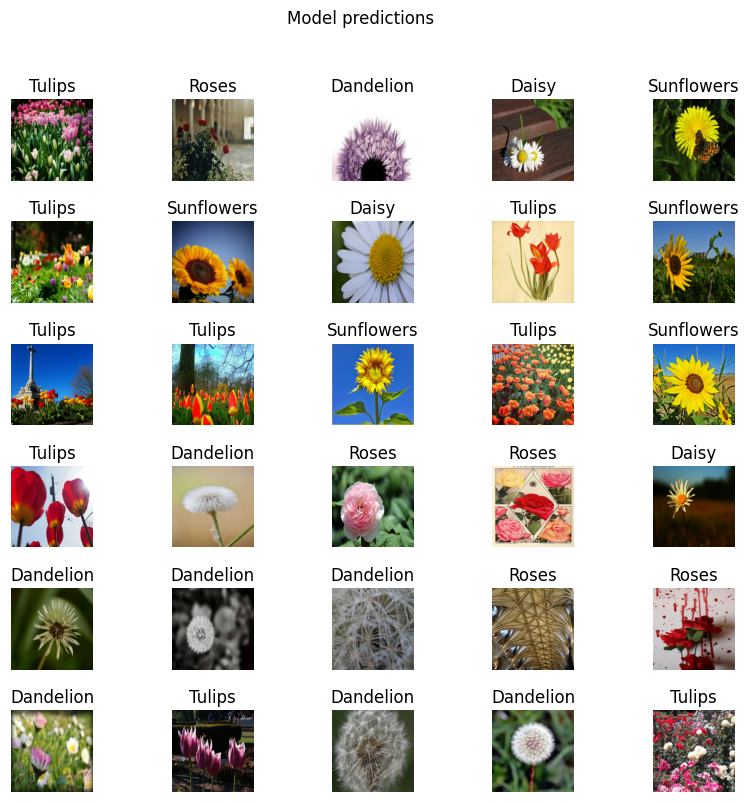

In [52]:
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")